# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-07 SVLR for One Sample

PA 4-07에서는 basic building node를 이용하여 bias term이 추가된 SVLR model을 학습시킵니다.  

linear model은
$$\hat{y} = \theta_{1}x + \theta_{0}$$
이고, loss는 square error를 사용하기 때문에
$$\mathcal{L} = (y - \hat{y})^{2}$$
가 됩니다.  

PA 4-07는 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.1 Contour Plots </li>
    <li> Step.2 Learning with Two Data Samples </li>
    <li> Step.3 Learning with Many Data Samples </li>
    <li> Step.4 Learning with Normal Distributions </li>
</ul>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Preparation

SVLR을 위한 dataset은
$$y = ax + b$$
의 식에서부터 만들어집니다.

그리고 LR_dataset_generator는 coefficient를 지정해주지 않으면 weight는 1, bias는 0으로 설정해주기 때문에  
bias term이 추가된 위의 함수에서 dataset을 만들기 위해선 coefficient를 지정해주어야 합니다.

또한 여러분들이 다양한 dataset에 대해서 실험을 할 수 있도록 normal distribution의 mean, standard deviation을 바꿔주는 method도 사용합니다.

다음은 dataset이
$$y = 2x - 1$$
에서부터 만들어지고, x는 standard normal distribution에서부터 만들어지는 코드입니다.



Text(0, 0.5, 'Y Data')

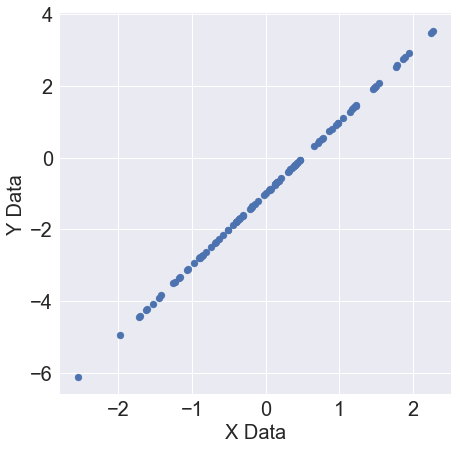

In [3]:
np.random.seed(0)

# Datset Setting
coefficient_list = [-1, 2]
distribution_params = {1:{'mean':0, 'std':1}}

# Dataset Generation
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()


# X,Y Data Extraction
x_data, y_data = dataset[:,:-1], dataset[:,-1]

# Data Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_data[:,1], y_data)
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel("X Data", fontsize = 20)
ax.set_ylabel("Y Data", fontsize = 20)

***
**Programming**  
다음의 조건에서부터 만들어지는 dataset을 LR_dataset_generator를 이용하여 만드세요.

- target function = $y = 5x + 2$
- mean, std of x = 0, 1

(Hint.1) set_coefficient method  
(Hint.2) set_distribution_params method

Text(0, 0.5, 'Y Data')

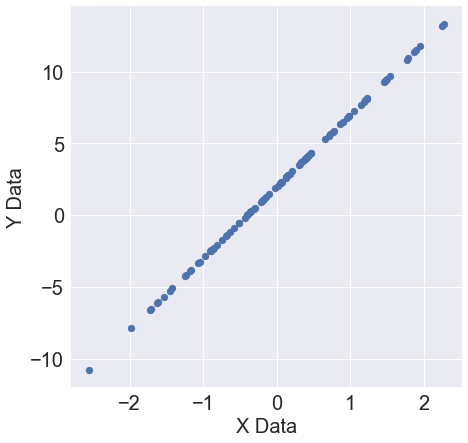

In [5]:
np.random.seed(0)

##### Start Your Code(Dataset Setting) #####
coefficient_list = [2, 5]
distribution_params = {1:{'mean':0, 'std':1}}
##### End Your Code(Dataset Setting) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


# X,Y Data Extraction
x_data, y_data = dataset[:,:-1], dataset[:,-1]

# Data Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_data[:,1], y_data)
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel("X Data", fontsize = 20)
ax.set_ylabel("Y Data", fontsize = 20)

***
## Step.2 Model/Loss Implementation

Step.2에서는 학습에 필요한 model과 loss function을 basic building node들을 이용하여 구현합니다.  
강의에서 사용된 model과 loss는 다음과 같습니다.
<img src='./imgs/4_07_01.png' width = 600>

따라서 model을 implementation하기 위해선 mul_node, plus_node가 필요하고,  
loss를 implementation하기 위해선 minus_node와 square_node가 필요합니다.

***
**Programming**  
SVLR without bias term model과 square error loss를 구현하는데 필요한 basic building node를 instantiation하세요.  

In [ ]:
##### Start Your Code(Model Implementation) #####
node1 = nodes.mul_node()
node2 = nodes.plus_node()
##### End Your Code(Model Implementation) #####


##### Start Your Code(Loss Implementation) #####
node3 = nodes.minus_node()
node4 = nodes.square_node()
##### End Your Code(Loss Implementation) #####

***
## Step.3 Learning

Step.3에서는 Step.1에서 만든 dataset과 Step.2에서 만든 node들을 이용하여 학습을 진행합니다.  
Chapter3에서부터 달라지는 점은, model에 plus_node가 추가된 점입니다.

***
**Programming**  
다음 조건에서 SVLR without bias term model을 학습시키세요.

- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3


Text(0.5, 1.0, '$\\mathcal{L}$')

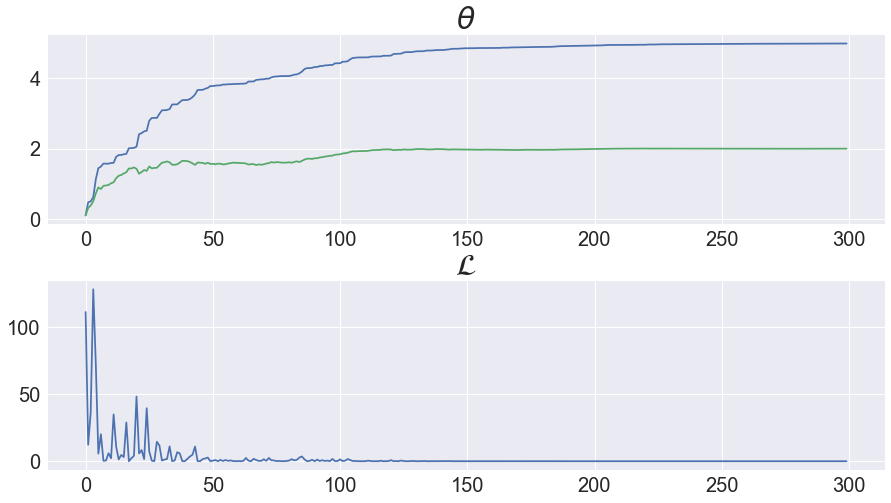

In [12]:
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####

th1_list, th0_list = [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        ##### Start Your Code(x, y Allocation) #####
        x, y = data_sample[1], data_sample[-1]
        ##### End Your Code(x, y Allocation) #####
        
        
        ##### Start Your Code(Forward Propagation) #####
        z1 = node1.forward(th1, x)
        z2 = node2.forward(th0, z1)
        z3 = node3.forward(y, z2)
        l = node4.forward(z3)
        ##### End Your Code(Forward Propagation) #####
        
        
        ##### Start Your Code(Backpropagation) #####
        dz3 = node4.backward(1)
        dy, dz2 = node3.backward(dz3)
        dth0, dz1 = node2.backward(dz2)
        dth1, dx = node1.backward(dz1)
        ##### End Your Code(Backpropagation) #####
        
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(l)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th1 = th1 - lr*dth1
        th0 = th0 - lr*dth0
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th1_list)
ax[0].plot(th0_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

위의 코드를 함수화하여 다음 실험에서 사용하기 편하도록 만들어줍니다.

trainer함수와 result_visualizer함수가 있으며, result_visualizer는 이미 만들어져있습니다.  
위의 학습에 관련된 코드를 이용하여 다음의 trainer함수를 완성시키세요.  
이때 trainer함수의 input/output은 다음과 같습니다.

- INPUT : dataset, th1, th0, lr, epochs
- OUTPUT : th1_list, th0_list, loss_list

In [ ]:
def trainer(dataset, th1, th0, lr, epochs):
    ##### Start Your Code(trainer Functionalization) #####
    th1_list, th0_list = [], []
    loss_list = []

    for epoch in range(epochs):
        for data_sample in dataset:
            x, y = data_sample[1], data_sample[-1]

            z1 = node1.forward(th1, x)
            z2 = node2.forward(th0, z1)
            z3 = node3.forward(y, z2)
            l = node4.forward(z3)

            dz3 = node4.backward(1)
            dy, dz2 = node3.backward(dz3)
            dth0, dz1 = node2.backward(dz2)
            dth1, dx = node1.backward(dz1)

            th1_list.append(th1)
            th0_list.append(th0)
            loss_list.append(l)

            th1 = th1 - lr*dth1
            th0 = th0 - lr*dth0
            
    ##### Start Your Code(trainer Functionalization) #####
    return th1_list, th0_list, loss_list


def result_visualizer(dataset, th1_list, th0_list, loss_list):
    fig = plt.figure(figsize = (15,10))
    left, bottom = 0.1, 0.1
    width, height = 0.3, 0.4
    spacing = 0.05

    ax_th = fig.add_axes([left, bottom + height + spacing, width,
                            1-(2*bottom + height + spacing)])
    ax_pred = fig.add_axes([left, bottom, width, height])
    ax_hist = fig.add_axes([left + width + spacing, bottom,
                           1 - (2*left + width + spacing), 2*height])

    ax_th.plot(th1_list, label = r'$\theta_{1}$')
    ax_th.plot(th0_list, label = r'$\theta_{0}$')
    ax_th.legend(loc = 'lower right', fontsize = 20)

    cmap = cm.get_cmap('rainbow', lut = len(th1_list))
    x_range = np.array([np.min(dataset[:,1]), np.max(dataset[:,1])])
    ax_pred.scatter(dataset[:,1], dataset[:,-1])
    for th_idx, (th1, th0) in enumerate(zip(th1_list, th0_list)):
        pred = th1*x_range + th0

        ax_pred.plot(x_range, pred, color = cmap(th_idx),
                    alpha = 0.3)

    ax_hist.hist(dataset[:,1], bins = int(dataset.shape[0]/10))

    axes = fig.get_axes()
    for ax in axes:
        ax.tick_params(axis = 'both', labelsize = 20)

위의 함수들을 이용하여 다음 조건에서의 학습을 진행하면 아래 셀의 코드가 됩니다.

- target function = $y = 5x + 2$
- mean, std of x = 0, 1  


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3



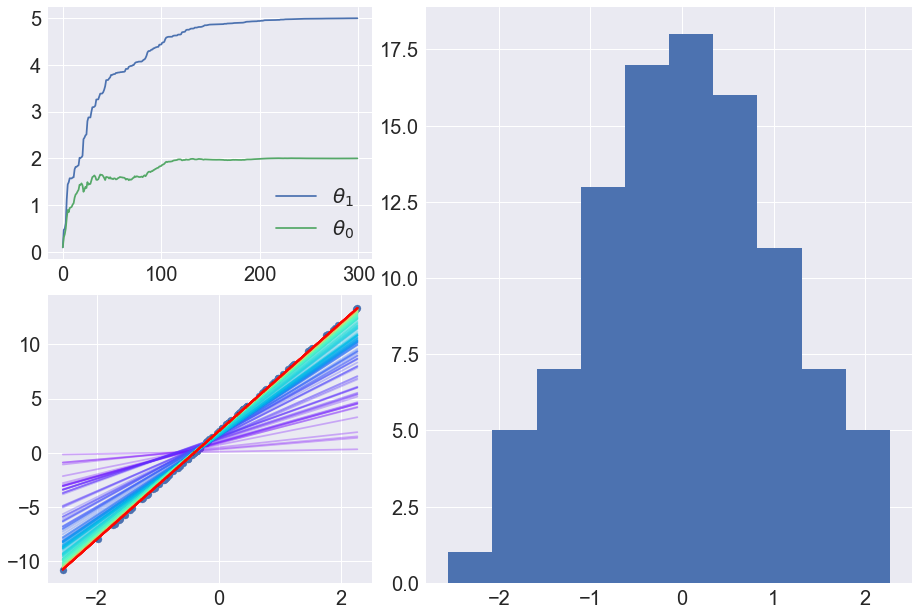

In [22]:
np.random.seed(0)
# Learning Preparation
coefficient_list = [2, 5]
distribution_params = {1:{'mean':0, 'std':1}}

th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3

# Dataset Generation
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()

# Training and Result visualization
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)

***
## Step.4 Weight, Bias Update

Step.4에서는 강의시간에 다뤘던 내용을 바탕으로 다양한 dataset에 따라 weight$(\theta_{1})$, bias$(\theta_{0})$의 학습속도의 차이가 발생하는 것을 확인합니다.

이때 $\theta_{1}, \theta_{0}$에 관한 GDM의 식은 다음과 같습니다.

$$\theta_{1} := \theta_{1} + 2\alpha x (y - \hat{y})$$
$$\theta_{0} := \theta_{0} + 2\alpha (y - \hat{y})$$

$$\vec{\theta} := \vec{\theta} - \alpha \bigtriangledown_{\vec{\theta}}\mathcal{L}(\vec{\theta})$$

아래의 PA들을 위의 식의 관점에서 $\theta_{1}, \theta_{0}$의 학습속도의 차이가 생기는 이유를 분석하세요.

참고로 target funcdtion의 weight와 bias, initial $\theta_{1}, \theta_{0}$를 동일하게 맞춘 것은 학습속도를 비교하기 위함입니다.


***
**Programming**  
- target function = $y = 3x + 3$
- mean, std of x = 0, 2  


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3

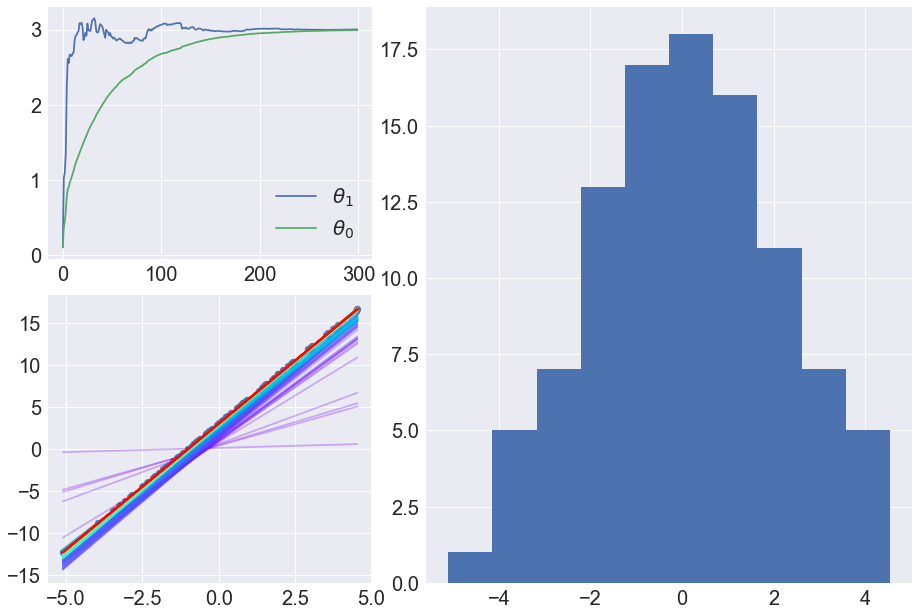

In [33]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':0, 'std':2}}

th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


##### Start Your Code(Training and Result Visualization) #####
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)
##### End Your Code(Training and Result Visualization) #####

***
**Programming**  
- target function = $y = 3x + 3$
- mean, std of x = 0, 0.2  


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3

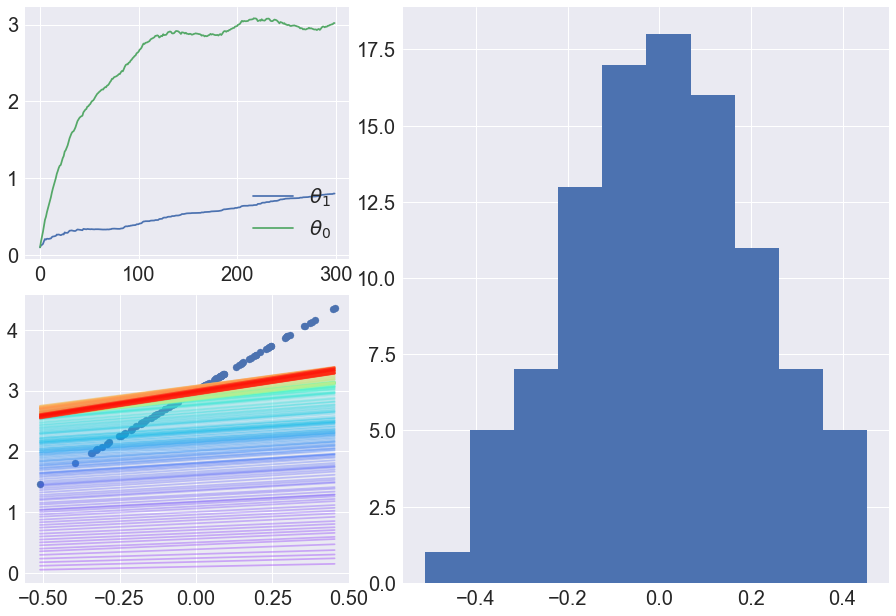

In [32]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':0, 'std':0.2}}

th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


##### Start Your Code(Training and Result Visualization) #####
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)
##### End Your Code(Training and Result Visualization) #####

***
**Programming**  
- target function = $y = 3x + 3$
- mean, std of x = 2, 1 


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3

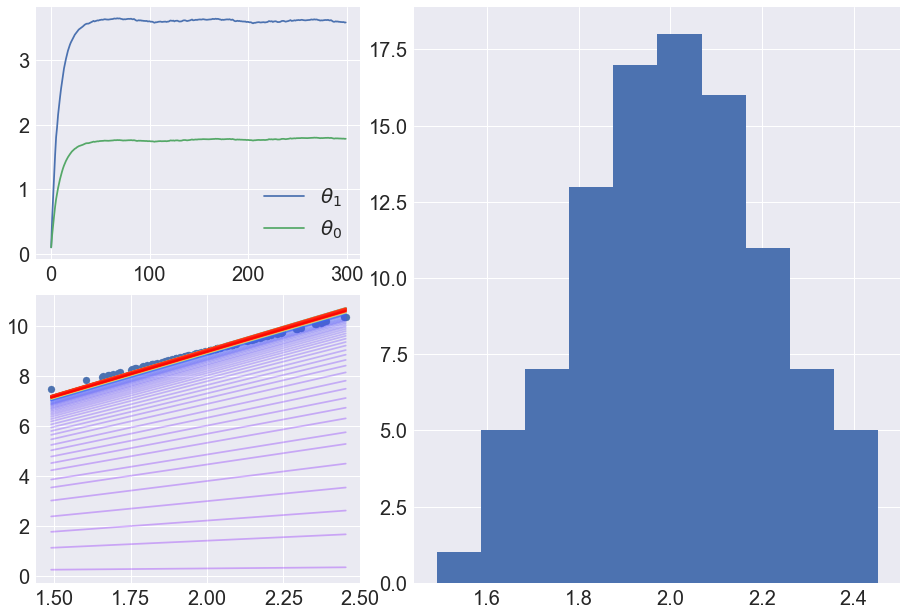

In [31]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':2, 'std':0.2}}

th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


##### Start Your Code(Training and Result Visualization) #####
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)
##### End Your Code(Training and Result Visualization) #####

***
**Programming**  
- target function = $y = 3x + 3$
- mean, std of x = -2, 1 


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3

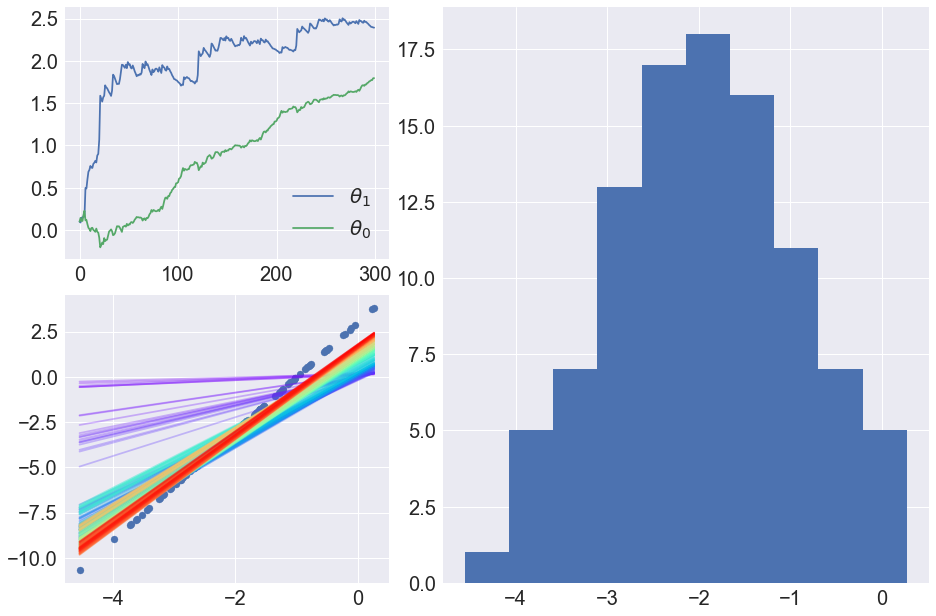

In [30]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':-2, 'std':1}}

th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


##### Start Your Code(Training and Result Visualization) #####
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)
##### End Your Code(Training and Result Visualization) #####

***
**Programming**  
다음의 상황은 실제 dataset과 같이 mean과 std가 주어진 상황입니다.  
이때 학습이 제대로 이뤄지지 않는 것을 확인하고, Feature scaling을 사용하지 않고 이를 해결하는 방법을 생각해보세요.  

- target function = $y = 3x + 3$
- mean, std of x = 30, 4 


- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 3

In [ ]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':15, 'std':4}}

th1, th0 = 0.1, 0.1
lr = 0.0001
epochs = 10000
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####


##### Start Your Code(Training and Result Visualization) #####
th1_list, th0_list, loss_list = trainer(dataset, th1, th0, lr, epochs)
result_visualizer(dataset, th1_list, th0_list, loss_list)
##### End Your Code(Training and Result Visualization) #####